# 1. Regression

### Import
Importing useful libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from math import log10
import time

### Data Loading
Data loading helper functions

In [2]:
def load_data(filename):
  data = []
  with open(filename, 'r') as file:
    first_line = file.readline().strip()
    metadata = list(map(int, first_line.split()))
    for line in file:
      row = [float(value) for value in line.split(',')]
      data.append(row)
    X, y = [], []
    for i in data:
        X.append(i[:metadata[0]])
        y.append(i[metadata[0]:])
  return X, y

def load_data2(filename):
  data = []
  with open(filename, 'r') as file:
    first_line = file.readline().strip()
    metadata = list(map(int, first_line.split()))
    for line in file:
      row = [float(value) for value in line.split(',')]
      data.append(row)
    X = data[:3]
    y = data[3:]
  return X, y

## 1.1 Unconstrained

In the `multilinear_regression` function, a column of ones is added to \( X \) to include an intercept term in the model. This modifies the regression equation from:

$$
y = X \beta + \epsilon
$$

to:

$$
y = \beta_0 + X \beta + \epsilon,
$$

where $\beta_0$ is the intercept.

By adding a column of ones, the augmented \( X \) matrix becomes:

$$
X = \begin{bmatrix} 1 & x_1 & x_2 & \dots & x_{10} \end{bmatrix},
$$

allowing the model to solve for both $\beta_0$
 and $\beta^*$
 in the unified equation:

$$
\beta^* = (X^\top X)^{-1} X^\top y.
$$


In [3]:
def multilinear_regression(X, y, bias = 1):
    if (bias == 1):
        X = np.c_[np.ones(X.shape[0]), X]
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta

This function `calculate_metrics` computes the Mean Squared Error (MSE), Mean Absolute Error (MAE), and Pearson Correlation coefficients between true and predicted values. It iterates over each column in `y_true` and `y_pred` to calculate correlation coefficients for multi-dimensional outputs.


In [4]:
def calculate_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    mae = np.mean(np.abs(y_true - y_pred))

    correlations = []
    for i in range(y_true.shape[1]):
        correlations.append(np.corrcoef(y_true[:, i], y_pred[:, i])[0, 1])
    return mse, mae, np.array(correlations)


This `predict` function adds a column of ones to `X` to account for the intercept term, and then calculates predictions by performing a dot product between `X` and the `coefficients`. It returns the predicted values `y_pred`.


In [5]:
def predict(X, β, bias = 1):
    if (bias == 1):
        X = np.c_[np.ones(X.shape[0]), X]
    y_pred = np.dot(X, β)
    return y_pred

The `compare` function calculates metrics such as MSE, MAE, and Pearson correlations, and visualizes the correlation between true and predicted values with scatter plots and the y=x reference line for each output.


In [ ]:
def compare(y_test, y_pred):
    mse, mae, correlations = calculate_metrics(y_test, y_pred)
    # Printing metrics
    print(f"\nMean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Pearson Correlations: {correlations}")

    # Creating correlation plots
    for i in range(y_test.shape[1]):
      plt.figure()
      plt.scatter(y_test[:, i], y_pred[:,i], alpha=0.5)
      min_val = min(y_test[:, i].min(), y_pred[:, i].min())
      max_val = max(y_test[:, i].max(), y_pred[:, i].max())
      plt.plot([min_val, max_val], [min_val, max_val], 'b--', label="y = x")
      plt.xlabel(f"True y{i+1}")
      plt.ylabel(f"Predicted y{i+1}")
      plt.title(f"Correlation Plot for y{i+1} (Correlation: {correlations[i]:.2f})")
      plt.show()

### 1.1.1 Multilinear Regression
This code loads regression data, splits it into training and testing sets, and performs a multilinear regression to calculate the optimal coefficient vector \( \beta^* \). It then uses \( \beta^* \) to predict outcomes on the test data and prints the coefficients.


β*=
 [[ 5.83146469 -2.18959553  8.23575574]
 [ 7.19415277 -8.24734448 -5.41016192]
 [-7.1144983  -6.07744644 -6.01913451]
 [-5.4514793  -1.96275615  5.80023679]
 [-7.94163693  6.64676949  0.94487318]
 [-9.70570531 -4.6871045  -8.4754585 ]
 [ 7.3614511  -2.55232857  0.72618395]
 [ 7.23744255  9.53092338 -3.46771326]
 [ 1.79455888  1.19620226 -0.46059843]
 [-2.01157994  9.57290031  9.56494863]
 [ 7.64014733  4.27925072 -7.34524873]]

Mean Squared Error: 0.04024425307952688
Mean Absolute Error: 0.16039402660467167
Pearson Correlations: [0.99995726 0.99994874 0.99994105]


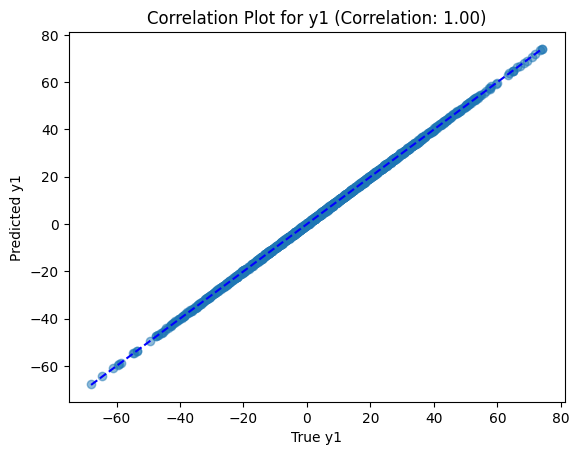

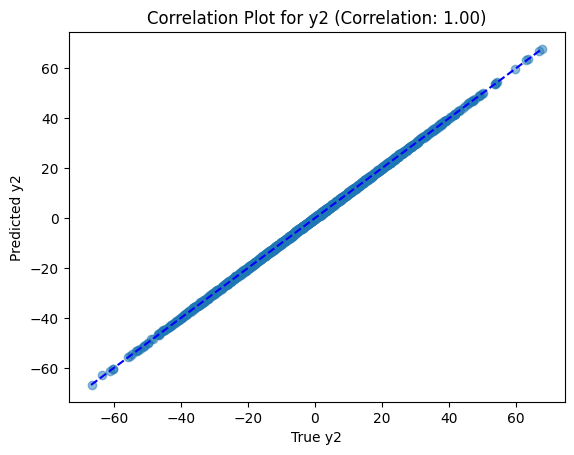

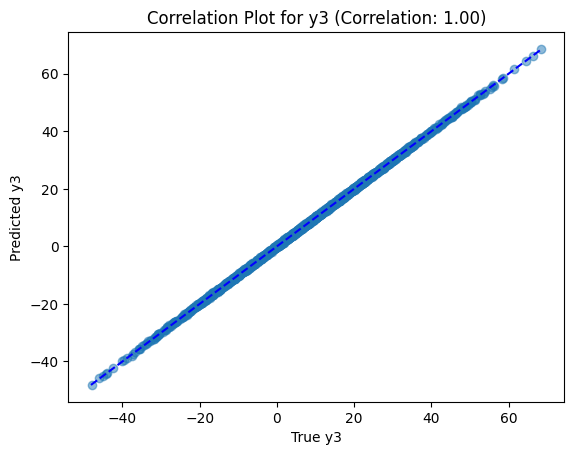

In [7]:
X, y = load_data('lin_regression/regression_data_001.txt')
X = np.array(X)
y = np.array(y)

split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Finding β*
β = multilinear_regression(X_train, y_train)
print("β*=\n", β)
compare(y_test, predict(X_test, β))

### 1.2 Linear Constrained

Mathematical Formulation of the Constrained Linear Regression Problem

Given matrices $ X $, $ y $, and $ A $, and vectors $ c $ and $ b $, we aim to solve for the optimal coefficients $ \beta $ in a regression problem while satisfying certain linear constraints represented by $ A $.

#### Objective
The goal is to minimize the least squares error for the regression model, defined as:

$$
\text{minimize } \| y - X\beta \|^2
$$

subject to the constraints:
$$
A \beta = b
$$


#### Solution

<!-- To solve this constrained optimization problem, we formulate the system as a block matrix: -->
Using Lagrangian function we will get:
$$
2 * X^TX\beta + A^T\lambda = 2 * X^Ty
$$
and 
$$
A \beta = b
$$

#### Matrix Setup
Construct the block matrix $ L $ and right-hand side vector $ R $ as follows:
$$
L =
\begin{bmatrix}
Q & -A^T \\
A & 0
\end{bmatrix}
\quad \text{and} \quad
R =
\begin{bmatrix}
h \\
b
\end{bmatrix}
$$

$$ Q = 2 *X^T X $$
$$ h = 2 * X^T y $$

where $ 0 $ represents a zero block matrix with dimensions $ A.shape[0] \times A.shape[0] $.

Since $X^TX $ is PD the optimal solution $ \beta^* $ will be unique.
The optimal solution $ \beta^* $ and Lagrange multipliers $\lambda $ for the constraints are obtained by solving the linear system:

$$
L \begin{bmatrix} \beta \\ \lambda \end{bmatrix} = R
$$

Extract $ \beta^* $ from the solution vector $ \begin{bmatrix} \beta^* \\ \lambda \end{bmatrix} $ to use in predictions and evaluate the model.

#### Model Evaluation
Using the calculated $ \beta $, we can predict $ y $ for test data $ X_{\text{test}} $ and compare the predictions with the true values $ y_{\text{test}} $ by calculating performance metrics such as Mean Squared Error (MSE) and correlation between predicted and actual values.



β*=
 [[  4.71950811  -3.00607205  -3.85370838]
 [ -5.55035901  -1.67205088  -4.8426783 ]
 [ -2.17503946  -2.89290563   5.59977155]
 [ -7.04872847   8.16370204   1.80235221]
 [-10.15976947  -7.60792132  -9.75463813]
 [  5.50941854   2.26677227   1.34938299]
 [  6.35546015   7.29734989  -4.65845369]
 [  7.65182745   6.11812648   1.12097293]
 [ 10.49456019   8.93052325   9.66109032]
 [  9.22681559   0.76524142  -7.63578284]]

Mean Squared Error: 148.1959046411481
Mean Absolute Error: 9.868960579531858
Pearson Correlations: [0.79408405 0.83488444 0.98505971]


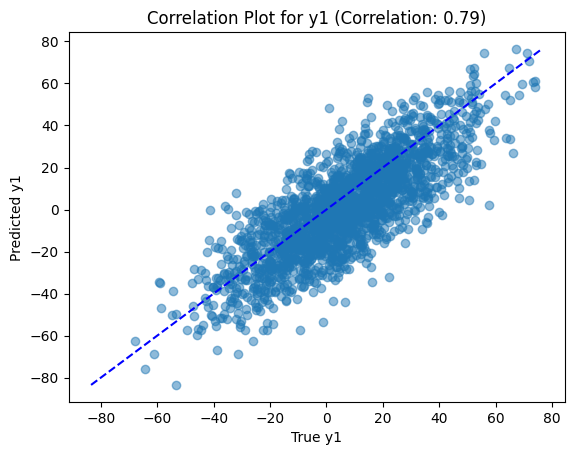

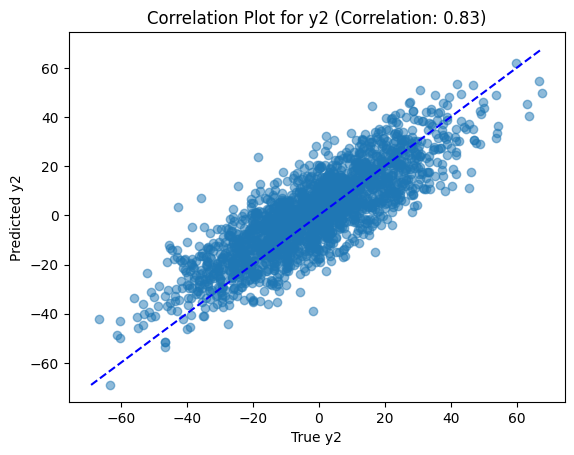

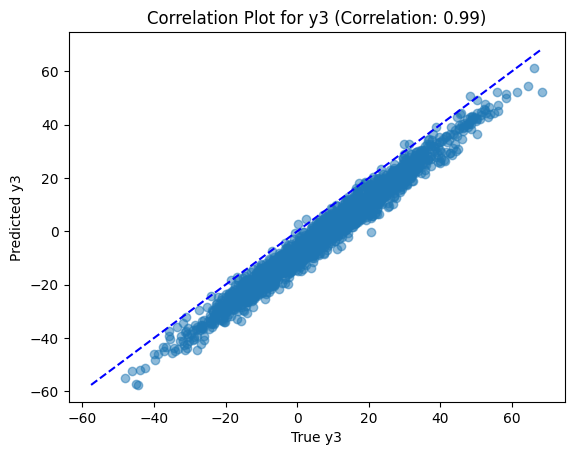

In [8]:
data = load_data2('constraints/constraints_001.txt')
A, c = data
A = np.array(A)
c = np.array(c)
b = np.concatenate((c, c, c), axis=1)
XTX = X_train.T @ X_train     # X^T.X
XTy = X_train.T @ y_train      # X^T.y
zero_block = np.zeros((A.shape[0], A.shape[0]))

Q = 2*XTX
h = 2*XTy

L = np.block([
    [Q, A.T],
    [A, zero_block]
])
R = np.concatenate((h, b))

# Solving using multilinear regression
βλ = multilinear_regression(L, R, bias = 0)
β = βλ[:-A.shape[0]]
print("β*=\n", β)
compare(y_test, predict(X_test, β, 0))

### 1.1.2 Generalised Regression with polynomial kernel

The `polynomial_kernel` function computes the polynomial kernel between two sets of data points `X` and `Y` for a specified degree. The kernel is calculated using the formula \((1 + X \cdot Y^T)^{degree}\), where \(X\) and \(Y\) are input matrices and `degree` is the polynomial degree.


In [9]:
def polynomial_kernel(X, Y, degree):
    return (1 + np.dot(X, Y.T)) ** degree

The function `train_polynomial_regression` trains a polynomial regression model by computing the kernel matrix for the input data \( X \) and solving for the dual coefficients \( \alpha \) using regularized least squares. The regularization term is controlled by `lambda_reg`.


In [10]:
def train_polynomial_regression(X, y, degree, lambda_reg=1e-5):
    K = polynomial_kernel(X, X, degree)
    n_samples = K.shape[0]
    alphas = np.linalg.inv(K + lambda_reg * np.eye(n_samples)) @ y
    return alphas

  `predict_polynomial_regression` predicts the output for polynomial regression using the polynomial kernel. It computes the kernel matrix between the test and training data, then predicts the values using the kernel and the learned coefficients (alphas).


In [11]:
def predict_polynomial_regression(X_test, X_train, alphas, degree):
    K_test = polynomial_kernel(X_test, X_train, degree)
    y_pred = np.dot(K_test, alphas)
    return y_pred

Loading data from a file, `poly_regression_data_008.txt`, and splits it into training and testing sets. It assigns 80% of the data to the training set and the remaining 20% to the testing set.


In [12]:
Xp, yp = load_data('poly_regression/poly_regression_data_008.txt')
Xp = np.array(Xp)
yp = np.array(yp)
split_ratio = 0.8
split_index = int(len(Xp) * split_ratio)
Xp_train, Xp_test = Xp[:split_index], Xp[split_index:]
yp_train, yp_test = yp[:split_index], yp[split_index:]


Running polynomial regression for different degrees (1 to 4) on the training data and predicts the corresponding output for the test data. It calculates metrics such as MSE, MAE, and Pearson correlations, and visualizes the correlation between true and predicted values with scatter plots and the y=x reference line for each output.




-----------------------------------------Polynomial Regression (Degree 1)-----------------------------------------


Mean Squared Error: 0.40075324660144784
Mean Absolute Error: 0.5004294831360179
Pearson Correlations: [0.5925679  0.61511378 0.90595426]


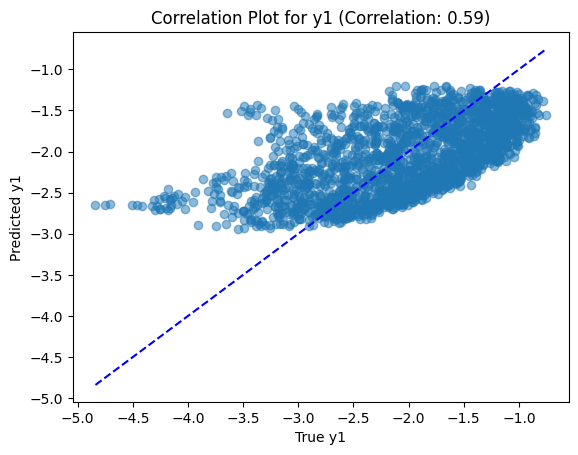

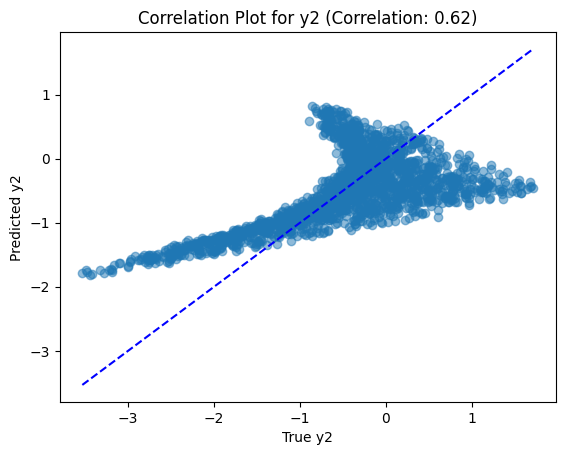

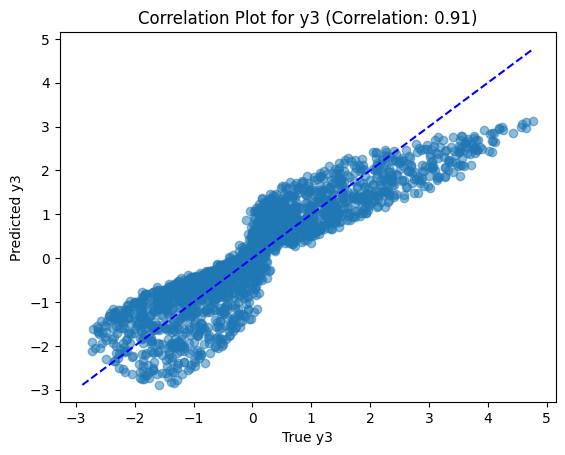



-----------------------------------------Polynomial Regression (Degree 2)-----------------------------------------


Mean Squared Error: 0.009718827197142857
Mean Absolute Error: 0.07885638045507672
Pearson Correlations: [0.99166439 0.99369032 0.99747505]


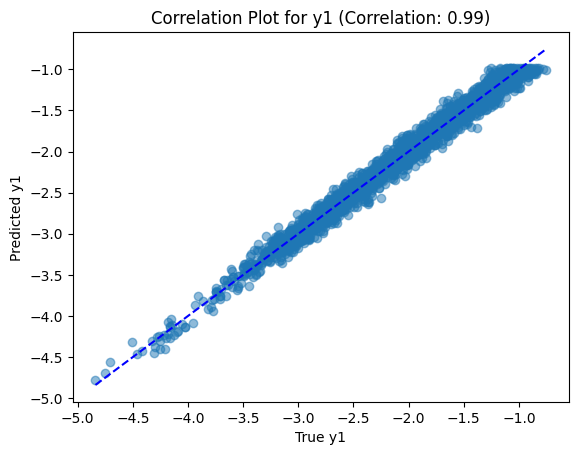

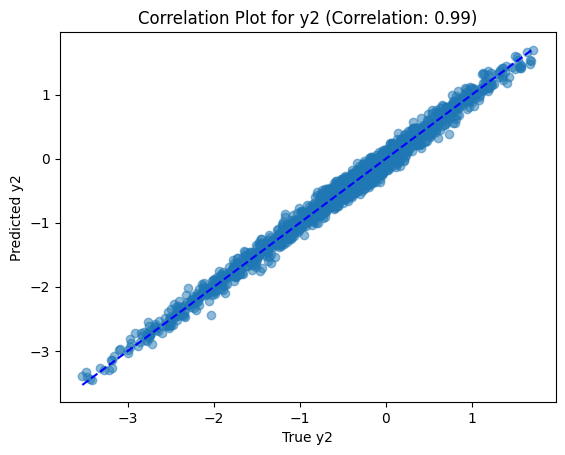

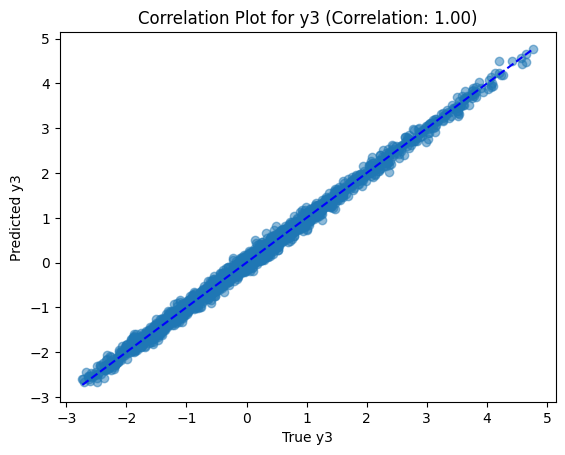



-----------------------------------------Polynomial Regression (Degree 3)-----------------------------------------


Mean Squared Error: 0.009719802785307406
Mean Absolute Error: 0.07885479588537346
Pearson Correlations: [0.99165487 0.99369656 0.99747461]


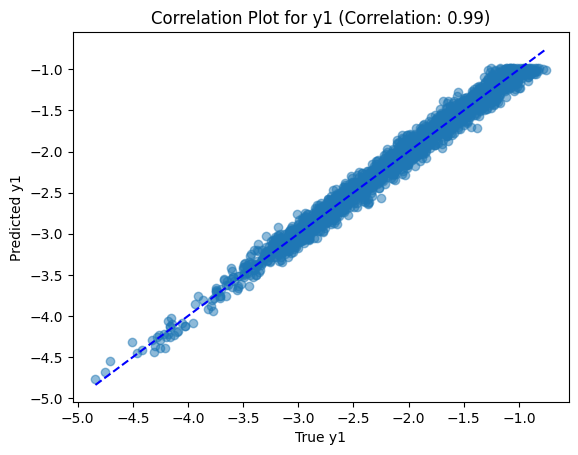

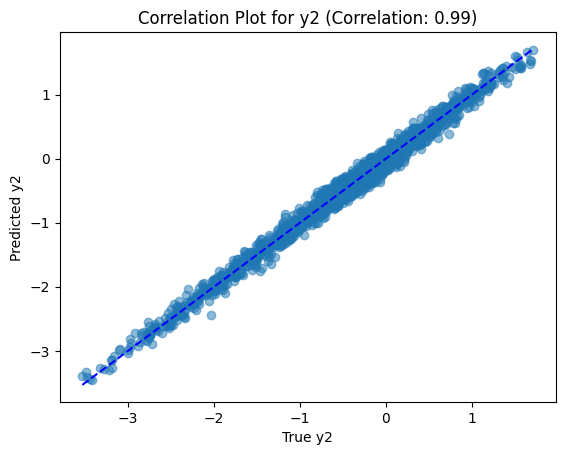

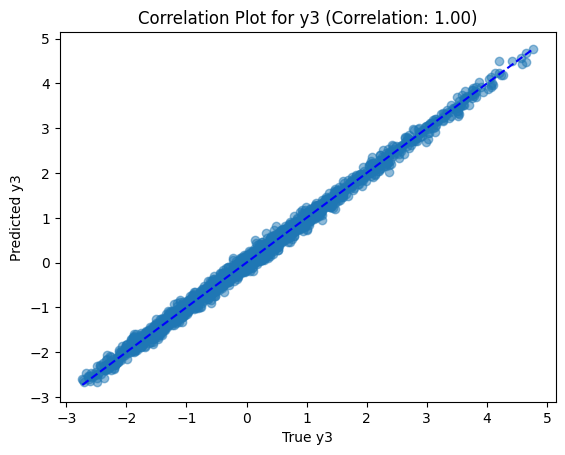



-----------------------------------------Polynomial Regression (Degree 4)-----------------------------------------


Mean Squared Error: 0.009731837648396252
Mean Absolute Error: 0.07889746483624062
Pearson Correlations: [0.99165257 0.99368773 0.99746952]


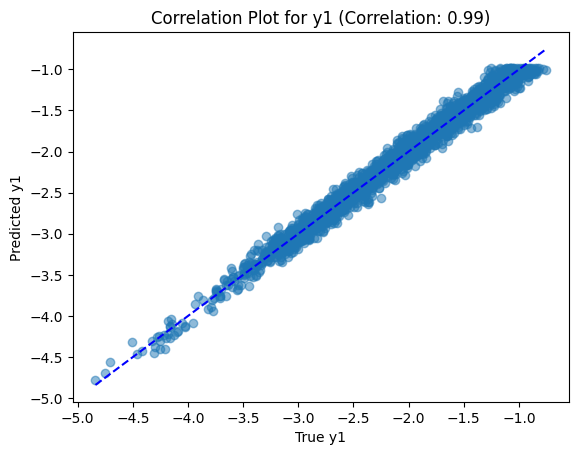

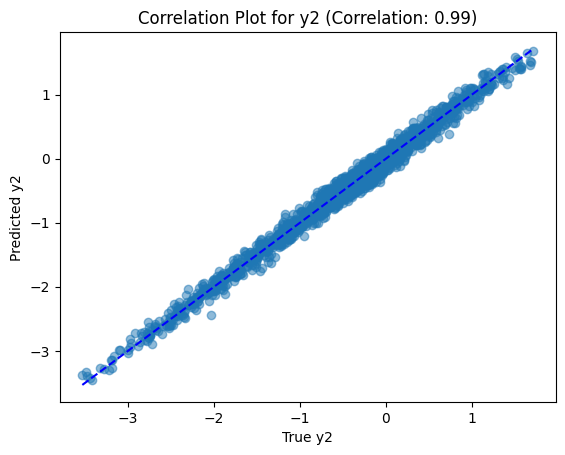

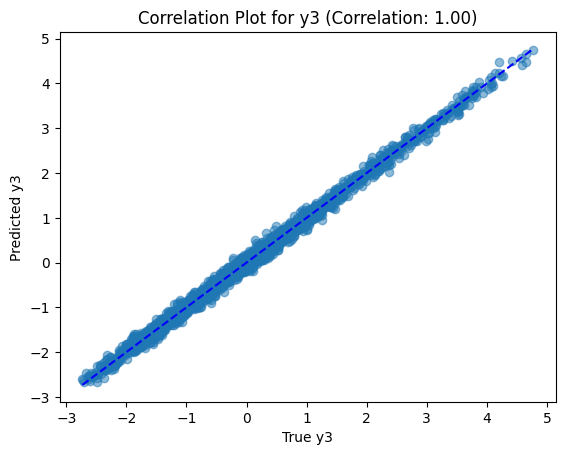

In [13]:
for degree in range(1, 5):
    print(f"\n\n-----------------------------------------Polynomial Regression (Degree {degree})-----------------------------------------\n")
    alphas = train_polynomial_regression(Xp_train, yp_train, degree)
    yp_pred = predict_polynomial_regression(Xp_test, Xp_train, alphas, degree)
    compare(yp_test, yp_pred)

# 2. Principle Component Analysis

### Data Loading

Loads MNIST training and test data from CSV files, then separates them into feature matrices (X) and label vectors (y).


In [14]:
def load_mnist_data(train_file, test_file):
    train_data = np.loadtxt(train_file, delimiter=',', skiprows=1)
    test_data = np.loadtxt(test_file, delimiter=',', skiprows=1)
    X_train = train_data[:, 1:]
    y_train = train_data[:, 0]
    X_test = test_data[:, 1:]
    y_test = test_data[:, 0]
    return X_train, y_train, X_test, y_test

This code defines two functions to load CIFAR-10 data. `load_cifar_batch` loads a single batch of CIFAR-10 data from a file, returning the image data and labels. `load_cifar10_data` iterates over the 5 training batches, loading and combining their data and labels, and then loads the test batch. It returns arrays for training data, training labels, test data, and test labels.


In [15]:
def load_cifar_batch(batch_filename):
    with open(batch_filename, 'rb') as file:
        batch_data = pickle.load(file, encoding='latin1')
    return batch_data['data'], batch_data['labels']
def load_cifar10_data(data_dir):
    data = []
    labels = []
    for batch in range(1, 6):
        batch_filename = os.path.join(data_dir, f'data_batch_{batch}')
        batch_data, batch_labels = load_cifar_batch(batch_filename)
        data.append(batch_data)
        labels.extend(batch_labels)
    data = np.concatenate(data, axis=0)
    labels = np.array(labels)
    test_batch_filename = os.path.join(data_dir, 'test_batch')
    test_data, test_labels = load_cifar_batch(test_batch_filename)

    return data, labels, test_data, test_labels

Data loading main function

In [18]:
train_file = 'MNIST_CSV/mnist_train.csv'
test_file = 'MNIST_CSV/mnist_test.csv'
data_dir = 'cifar-10-batches-py'
mnist_dataset = load_mnist_data(train_file, test_file)
cifar_dataset = load_cifar10_data(data_dir)

### 2.1.1 Metrics Calculation Functions
- `calculate_mse`: Computes the Mean Squared Error (MSE) by flattening two arrays and finding the average squared difference between corresponding elements.
- `calculate_psnr`: Computes the Peak Signal-to-Noise Ratio (PSNR) using the MSE, returning a high value (100) if MSE is zero; otherwise, it calculates PSNR based on a formula involving MSE.


In [19]:
def calculate_mse(original, reconstructed):
    original_flat = original.flatten()
    reconstructed_flat = reconstructed.flatten()
    mse = np.mean((original_flat - reconstructed_flat) ** 2)
    return mse

def calculate_psnr(original, reconstructed):
    mse = calculate_mse(original, reconstructed)
    if mse == 0:
        return 100
    return 20 * log10(255.0 / np.sqrt(mse))

### 2.1 PCA Implementation

#### 2.1.1 `standardize_data(X)`
Centers data by subtracting the mean of each feature, returning the centered data and mean.


In [20]:
def standardize_data(X):
    mean = np.mean(X, axis=0)
    X_centered = X - mean
    return X_centered, mean

#### 2.1.2 PCA Computation
`compute_pca_eigen(X, n_components)`
1. **Covariance Calculation**: Compute the covariance matrix of `X`.
2. **Eigen Decomposition**: Perform eigen decomposition on the covariance matrix.
3. **Sort and Select Components**: Sort eigenvectors by their eigenvalues (descending), then retain the top `n_components`.
4. **Explained Variance Ratio**: Calculate the variance ratio for each selected component.


In [21]:
def compute_pca_eigen(X, n_components):
    covariance_matrix = np.cov(X.T)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    eigenvalues = np.real(eigenvalues)
    eigenvectors = np.real(eigenvectors)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    eigenvectors = eigenvectors[:, :n_components]
    explained_variance_ratio = eigenvalues[:n_components] / np.sum(eigenvalues)
    return eigenvectors, explained_variance_ratio

#### 2.1.3 Reconstruction Images from PCA Components
`reconstruct_images(X, components, mean)`
Projects `X` onto principal components, reverses the projection, and adds the mean to produce reconstructed data.


In [22]:
def reconstruct_images(X, components, mean):
    X_projected = np.dot(X, components)
    X_reconstructed = np.dot(X_projected, components.T)
    X_reconstructed += mean
    return X_reconstructed

### 2.2 Analysis and Visualization

#### 2.2.1 Visualisation and Analysis
Original and Reconstructed Image Visualization with MSE and PSNR
`plot_images` displays 10 original and reconstructed images side-by-side for MNIST or CIFAR-10, using indices specific to each dataset. For each image, it calculates and prints Mean Squared Error (MSE) and Peak Signal-to-Noise Ratio (PSNR) metrics, along with average values, helping analyze reconstruction quality across varying PCA components.


In [23]:
def plot_images(original, reconstructed, dataset, pca_components, indices=range(10)):
    fig, ax = plt.subplots(2, len(indices), figsize=(15, 5))
    mse_list = []
    psnr_list = []
    MNIST_indices = [0, 2, 4, 6, 1, 10, 12, 14, 16, 3]
    CIFAR_indices = [29, 4, 6, 9, 3, 27, 0, 7, 8, 1]
    for i in range(10):
        if dataset == 'MNIST':
            ax[0, i].imshow(original[MNIST_indices[i]].reshape(28, 28), cmap='gray')
            ax[1, i].imshow(reconstructed[MNIST_indices[i]].reshape(28, 28), cmap='gray')
            mse = calculate_mse(original[MNIST_indices[i]], reconstructed[MNIST_indices[i]])
            psnr = calculate_psnr(original[MNIST_indices[i]], reconstructed[MNIST_indices[i]])
        else:
            ax[0, i].imshow(original[CIFAR_indices[i]].reshape(32, 32, 3).astype(np.uint8))
            ax[1, i].imshow(reconstructed[CIFAR_indices[i]].reshape(32, 32, 3).astype(np.uint8))
            mse = calculate_mse(original[CIFAR_indices[i]],reconstructed[CIFAR_indices[i]])
            psnr = calculate_psnr(original[CIFAR_indices[i]],reconstructed[CIFAR_indices[i]])
        ax[0, i].set_title(f"Original {i+1}")
        ax[0, i].axis('off')
        ax[1, i].set_title(f"Reconstructed {i+1}")
        ax[1, i].axis('off')

        mse_list.append(mse)
        psnr_list.append(psnr)

    plt.tight_layout()
    plt.show()

    print(f"Using {pca_components} components:")
    print("MSE for images:", mse_list)
    print("PSNR for images:", psnr_list)
    print("Average MSE:", np.mean(mse_list))
    print("Average PSNR:", np.mean(psnr_list))


#### PCA
Performs PCA on a dataset by standardizing training data, computing principal components, reconstructing images, and visualizing original vs. reconstructed images. Takes dataset, number of components, and dataset name as inputs.


In [24]:
def PCA(dataname, dataset, pca_components = 50):
    X_train, y_train, X_test, y_test = dataset
    X_train_standardized, mean_train = standardize_data(X_train)
    components, explained_variance_ratio = compute_pca_eigen(X_train_standardized, pca_components)
    X_train_reconstructed = reconstruct_images(X_train_standardized, components, mean_train)
    plot_images(X_train, X_train_reconstructed, dataname, pca_components)

#### 2.2.2.a Running PCA for differenct number of PCA components


##### For MNIST dataset

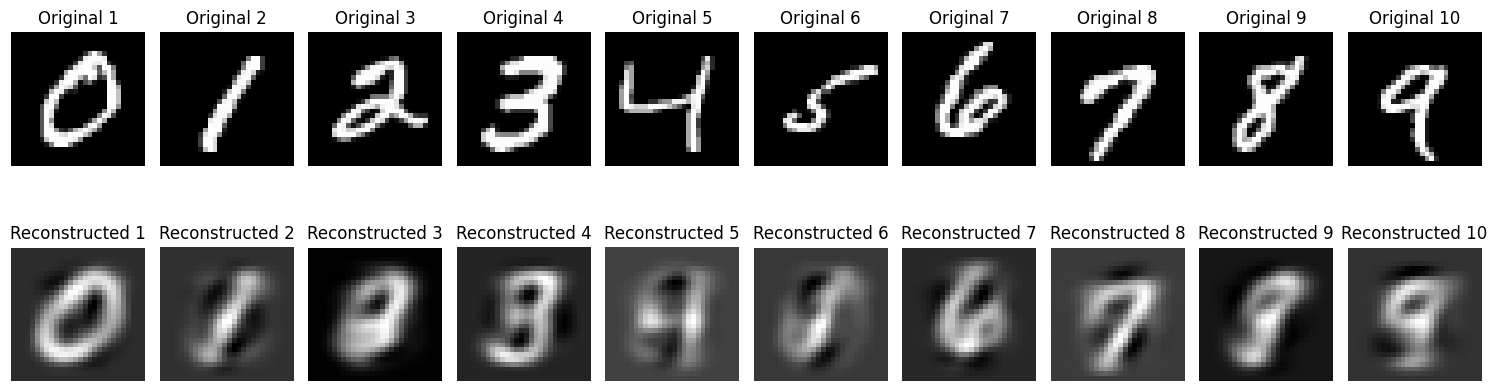

Using 10 components:
MSE for images: [np.float64(1808.5059208359016), np.float64(1186.0216106123405), np.float64(3201.1476641077493), np.float64(1730.5338880556053), np.float64(2900.918514224013), np.float64(2362.261554465553), np.float64(2146.3967443953493), np.float64(1427.4866536294576), np.float64(1956.9079108536434), np.float64(2211.7943920791445)]
PSNR for images: [15.557604259388363, 17.389877584465946, 13.0777465291308, 15.749002526139847, 13.505448310724471, 14.397523789484485, 14.813703599312955, 16.5850830439288, 15.215099719749146, 14.683356082785261]
Average MSE: 2093.1974853258757
Average PSNR: 15.097444544511006


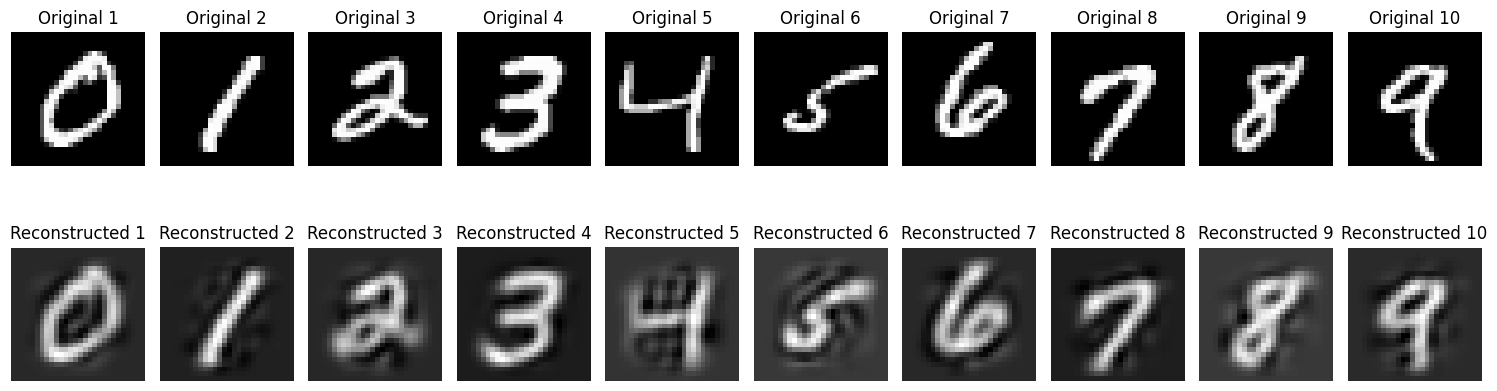

Using 50 components:
MSE for images: [np.float64(636.6627047107288), np.float64(286.78041654301916), np.float64(957.2680776957947), np.float64(543.7794974060537), np.float64(1590.684729114072), np.float64(857.3645922745438), np.float64(949.8740248514882), np.float64(476.1463470874344), np.float64(596.8722081855734), np.float64(852.4538333202311)]
PSNR for images: [20.091709509486755, 23.55530869652092, 18.320467842609336, 20.776575318924024, 16.114962490867327, 18.79914816959576, 18.35414349199713, 21.353399040212704, 20.371990033075203, 18.824094928247096]
Average MSE: 774.7886431188938
Average PSNR: 19.65617995215363


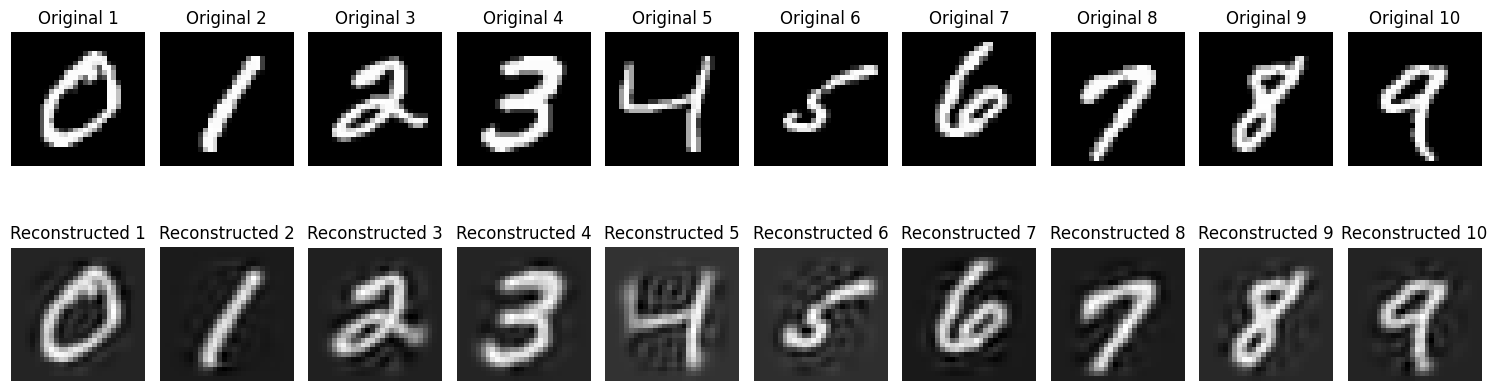

Using 100 components:
MSE for images: [np.float64(277.7967906604844), np.float64(183.44402081563425), np.float64(421.0822446780655), np.float64(351.9064888257671), np.float64(903.9641029035242), np.float64(417.60860775274534), np.float64(343.96018483754693), np.float64(308.74669996294836), np.float64(227.72979104720582), np.float64(382.78082299597634)]
PSNR for images: [23.693531367683054, 25.495767999631596, 21.88713431489701, 22.666530859757614, 18.569291762116347, 21.923109190992992, 22.76572187209465, 23.234780365290657, 24.55660513207926, 22.301301890140138]
Average MSE: 381.9019754479898
Average PSNR: 22.709377475468333


In [25]:
PCA("MNIST", mnist_dataset , pca_components= 10)
PCA("MNIST", mnist_dataset , pca_components= 50)
PCA("MNIST", mnist_dataset , pca_components= 100)

##### For CIFAR-10 dataset


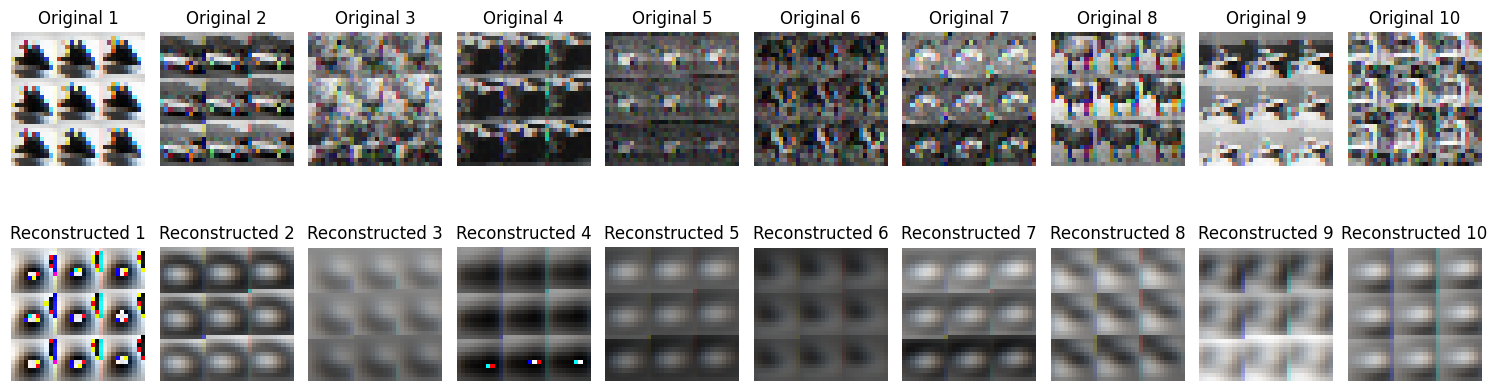

Using 10 components:
MSE for images: [np.float64(2060.653645660526), np.float64(1722.7936310060086), np.float64(2195.84972789073), np.float64(1605.698050809573), np.float64(580.2716903610788), np.float64(1256.220173934933), np.float64(996.8409467609731), np.float64(2346.6299771063), np.float64(1826.3509495698036), np.float64(2518.7983380693204)]
PSNR for images: [14.99075359102756, 15.768471033172007, 14.714777448443598, 16.074164806950524, 20.494489776545322, 17.14014597306727, 18.144544918787524, 14.426357465867284, 15.514961261051937, 14.118869627900374]
Average MSE: 1711.0107131169248
Average PSNR: 16.13875359028134


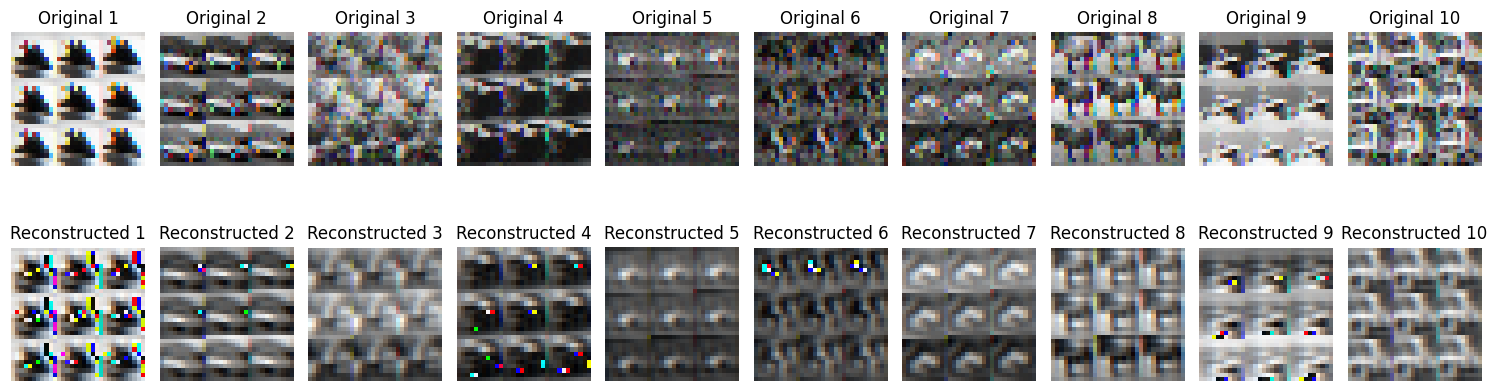

Using 50 components:
MSE for images: [np.float64(916.9832445607848), np.float64(750.2446391174213), np.float64(854.7881155503488), np.float64(766.2765108604309), np.float64(260.9065296874031), np.float64(647.7883393425337), np.float64(584.9345793218855), np.float64(1083.5217963188343), np.float64(792.4426634264854), np.float64(1363.7441466370353)]
PSNR for images: [18.507189607063676, 19.378774600166583, 18.812218854979935, 19.286948477998706, 23.965954125774953, 20.016472347373956, 20.45973064748597, 17.782427087784928, 19.141125118813534, 16.783474613145486]
Average MSE: 802.1630564823164
Average PSNR: 19.41343154805877


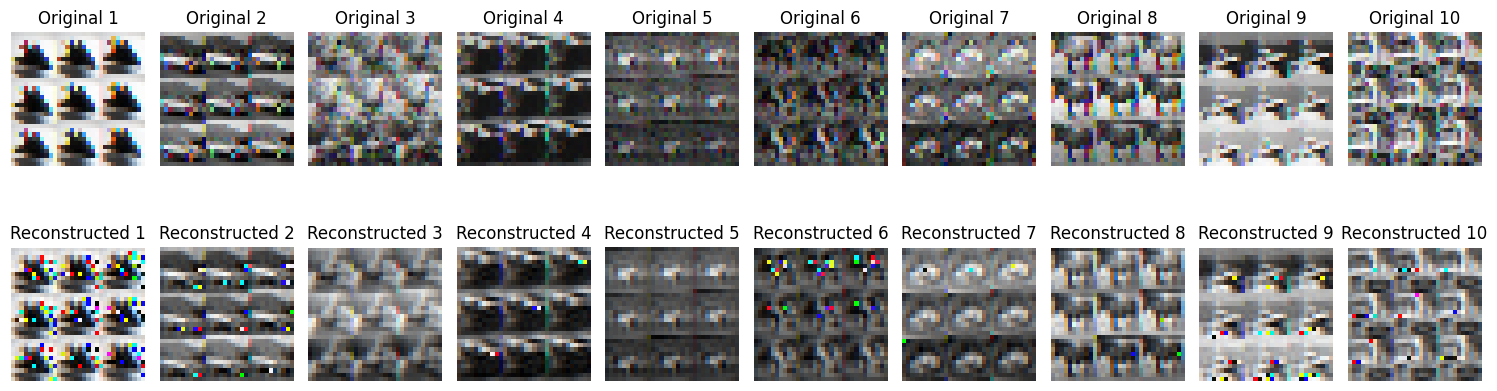

Using 100 components:
MSE for images: [np.float64(451.11922949966134), np.float64(498.67821483912513), np.float64(677.4155006094222), np.float64(387.3999025333272), np.float64(156.15240593370322), np.float64(438.05650714189596), np.float64(436.4582779884736), np.float64(613.6748741452918), np.float64(383.5196213056933), np.float64(820.6719728377326)]
PSNR for images: [21.587890210510714, 21.152599647406078, 19.822252309270006, 22.24920853749773, 26.195316808147794, 21.71550224891144, 21.73137626011661, 20.251420186552455, 22.29292773008455, 18.98910758990613]
Average MSE: 486.31465068343266
Average PSNR: 21.598760152840352


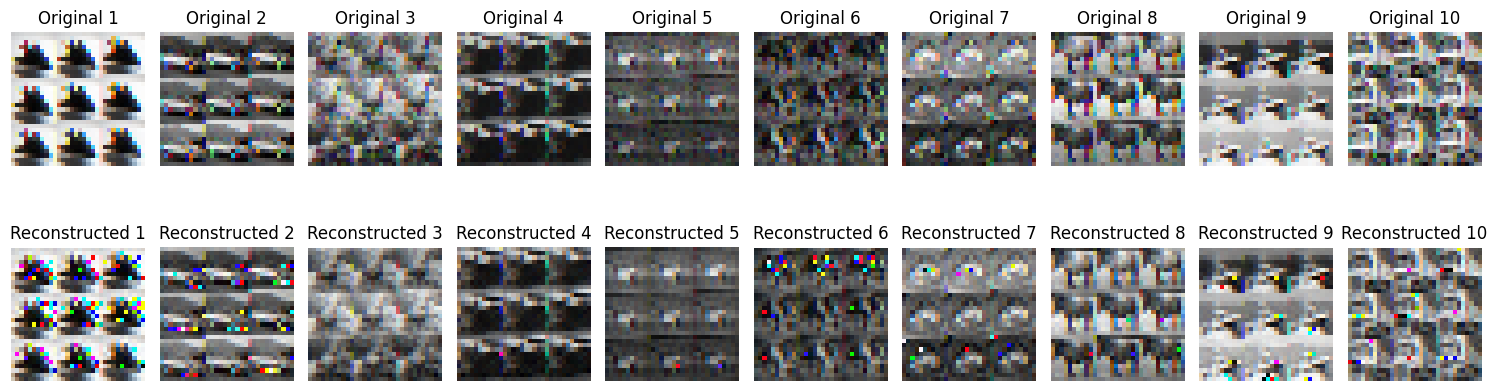

Using 200 components:
MSE for images: [np.float64(176.24049195035604), np.float64(233.67363644049564), np.float64(406.7612163004678), np.float64(171.8082545343242), np.float64(95.04740335795111), np.float64(230.652176494705), np.float64(247.67669246544367), np.float64(319.68549741316565), np.float64(168.97057847800843), np.float64(432.7896623289683)]
PSNR for images: [25.669746644520103, 24.44470643744289, 22.03740823573115, 25.780363351760162, 28.351401041874094, 24.50122803787139, 24.19195221500116, 23.0835742599221, 25.852692699644003, 21.768034822608577]
Average MSE: 248.3305609763886
Average PSNR: 24.56811077463756


In [26]:
PCA("CIFAR", cifar_dataset, pca_components= 10)
PCA("CIFAR", cifar_dataset, pca_components= 50)
PCA("CIFAR", cifar_dataset, pca_components= 100)
PCA("CIFAR", cifar_dataset, pca_components= 200)

## 2.2.2 Comparative Performance of Gray-scale (MNIST) and Color (CIFAR-10) Image Reconstructions Using PCA

## Results and Analysis

### 1. **Effect of Number of Components on Reconstruction Quality**
As the number of PCA components increases, the reconstruction quality improves, as more variance in the data is captured. The table below shows the MSE and PSNR for both MNIST and CIFAR-10 reconstructions with varying numbers of components.

| **Dataset**   | **Components** | **MSE**    | **PSNR (dB)** |
|---------------|----------------|-----------|---------------|
| MNIST     | 10             | 2093     | 15.09          |
| MNIST     | 50            | 774     | 19.65          |
| MNIST     | 100            | 381      | 22.7         |
| CIFAR-10  | 10         | 1711    | 16.1          |
| CIFAR-10  | 50        | 802    | 19.4          |
| CIFAR-10  | 100        | 486     | 21.5          |

- **MNIST (Gray-scale)**: The MSE decreases and PSNR increases with the number of components. The reconstruction quality is relatively high even with fewer components, as the data is less complex.
  
- **CIFAR-10 (Color)**: For CIFAR-10, the MSE is higher compared to MNIST, and the PSNR is lower, which indicates that color images require more components for good reconstruction. This is expected because color images have more complex features compared to gray-scale images.

### 2. **Visual Comparison**

In the case of MNIST, the reconstruction quality is quite good even with fewer components. For CIFAR-10, however, the reconstructions are more blurry, which is a result of the increased complexity of color images.

### 3. **Comparison of Reconstruction Performance**
- **Gray-scale (MNIST)**: The reconstruction quality improves rapidly with the number of components. Even with 100 components, the reconstructed images are visually close to the original, with only slight details lost.
  
- **Color (CIFAR-10)**: Color images require significantly more components to achieve good reconstruction. The performance improves at a slower rate compared to MNIST, and even with 200 components, some details are lost, especially for fine textures and edges.

### 4. **Compression Ratio vs. Image Quality**
The compression ratio can be defined as the ratio of the number of original features to the number of components used in PCA. As we increase the number of components, the compression ratio decreases, leading to higher reconstruction quality but less compression.

| **Dataset**   | **Compression Ratio (50 Components)** | **MSE**    | **PSNR (dB)** |
|---------------|--------------------------------------|-----------|---------------|
| MNIST   | 784/100 = 7.84                       | 381     | 22.7          |
| CIFAR-10 | 3072/100 = 30.72                    | 486     | 21.5          |

### Conclusion

- **Gray-scale MNIST**: The PCA-based reconstruction yields excellent quality even with a small number of components. The MSE is low, and the PSNR is high even for modest compression ratios.
  
- **Color CIFAR-10**: The reconstruction quality for color images is lower than that of gray-scale images, and more components are needed to achieve high-quality reconstruction. The MSE remains higher, and PSNR is lower, even with more components.


---



# 3. Stationary Distribution of Markov Chain

### Loading data
`load_data` function will help in loading the data from the `P_008.txt` file.

In [27]:
def load_data3(filename):
  P = []
  with open(filename, 'r') as file:
    row = []
    for line in file:
      row.append([str(value) for value in line.split(',')])
    for r in row:
      P.append([float(value) for value in r[0].split(' ')])
  return np.array(P)


### Direct Method

Given a transition matrix $P$ of size $100 \times 100$, the stationary distribution $\pi$ satisfies:

1. **Stationarity Condition**:
   $$
   \pi^T P = \pi^T \quad \Rightarrow \quad \pi^T (P - I) = 0
   $$
   This gives $100$ equations for $100$ unknowns.

2. **Normalization Condition**:
   $$
   \pi^T 1 = 1
   $$
   Ensures the sum of $\pi$ components equals 1.

#### Number of Equations and Variables
- $100$ equations from stationarity.
- $1$ equation from normalization.

Thus, there are $101$ equations and $100$ variables.

#### Solving the System
The system is overdetermined, but the normalization condition adjusts it. Solve:
$$
A \pi = b
$$
where $A = P^T - I$ and $b[-1] = 1$, yielding the unique stationary distribution $\pi$.


In [28]:
def compute_stationary_direct(P):
    n = P.shape[0]
    b = np.zeros(n)
    A = P.T - np.eye(n)
    A[-1, :] = 1
    b[-1] = 1
    return np.dot(np.linalg.inv(A), b)

### Power Method for Stationary Distribution
This `compute_stationary_power` iteratively computes the stationary distribution $\pi$ of a transition matrix $P$ using the Power Method as discussed in class (and in lecture notes), stopping when the change between iterations is smaller than a tolerance or the maximum iterations are reached.


In [29]:
def compute_stationary_power(P, tol=1e-8, max_iter=1000):
    n = P.shape[0]
    pi = np.ones(n) / n
    for i in range(max_iter):
        new_pi = pi @ P
        if np.linalg.norm(new_pi - pi, 1) < tol:
            return new_pi, i
        pi = new_pi
    return pi, max_iter

#### Veryfying Distribution
The `verify_stationary_distribution` function computes the error between the computed stationary distribution $\pi$ and the actual stationary distribution using the L1 norm. It also returns the sum of the components of $\pi$ to ensure it equals 1.


In [30]:
def verify_stationary_distribution(P, pi):
    error = np.linalg.norm(pi @ P - pi, 1)
    sum_pi = np.sum(pi)
    return error, sum_pi

### Calculation and Comparision Results

1. **Direct Method**: Computes the stationary distribution $\pi$ with its error and execution time.
2. **Power Method**: Computes $\pi$ iteratively, showing convergence iterations and execution time.
3. **Comparison**: Compares errors and execution times of the direct and power methods.
4. **Accuracy**: Displays the errors for both methods.
5. **Computational Efficiency**: Compares the execution times of the two methods.


In [31]:

P = load_data3('transition_matrices/P_008.txt')

# Direct method
start_time = time.time()
pi_direct = compute_stationary_direct(P)
time_direct = time.time() - start_time
error_direct, sum_direct = verify_stationary_distribution(P, pi_direct)

# Power method
start_time = time.time()
pi_power, iterations_power = compute_stationary_power(P)
time_power = time.time() - start_time
error_power, sum_power = verify_stationary_distribution(P, pi_power)

print("Direct Method:")
print("Stationary Distribution (π):", pi_direct)
print("Error (||π⊤P - π⊤||₁):", error_direct)
print("Sum of π:", sum_direct)
print("Execution Time:", time_direct, "seconds")

print("\nPower Method:")
print("Stationary Distribution (π):", pi_power)
print("Error (||π⊤P - π⊤||₁):", error_power)
print("Sum of π:", sum_power)
print("Iterations for Convergence:", iterations_power)
print("Execution Time:", time_power, "seconds")

print("\nComparison:")
print("Accuracy:")
print("Direct method error:", error_direct)
print("Power method error:", error_power)


print("\nComputational Efficiency:")
print("Direct method time:", time_direct)
print("Power method time:", time_power)


Direct Method:
Stationary Distribution (π): [0.00881672 0.01038619 0.0093248  0.00986107 0.00890843 0.00905618
 0.0104268  0.01008536 0.01013856 0.01008627 0.00946903 0.01005004
 0.01039549 0.01107021 0.01005826 0.01018863 0.01011913 0.01053488
 0.00946717 0.00913167 0.01014592 0.01096579 0.00956576 0.00953922
 0.01043032 0.01004577 0.00949422 0.00966776 0.01074929 0.00994642
 0.00992029 0.00965172 0.00958922 0.01064684 0.00985292 0.0099738
 0.01104734 0.00955717 0.00868335 0.010698   0.00861039 0.01093095
 0.01110307 0.00933843 0.01006935 0.0110716  0.00990908 0.0094745
 0.01059182 0.00980599 0.00999269 0.01071129 0.01099232 0.01089428
 0.0098782  0.01039944 0.01050427 0.00930321 0.00943418 0.01094622
 0.00992245 0.00945618 0.01013478 0.0099235  0.01011309 0.00922796
 0.00913135 0.01025017 0.00965613 0.01092748 0.00947531 0.00938851
 0.00985814 0.01027037 0.00991634 0.00950987 0.0093776  0.00981229
 0.01068009 0.00926201 0.00911516 0.00973615 0.01122639 0.01096509
 0.01032183 0.010520

### Impact of Matrix Size (Power Method)

This section tests the effect of matrix size on the Power Method for computing the stationary distribution. Matrix sizes $( 20 \times 20 )$, $( 50 \times 50 )$, $( 70 \times 70 )$, and $( 100 \times 100 )$ are used. For each size:
- A submatrix is extracted and normalized.
- The stationary distribution is computed, and the time, iterations, and error are printed.


In [32]:
matrix_sizes = [20,50,70,100]
for size in matrix_sizes:
  if size == 100:
    P_sub = P
  else:
    start_index = (100 - size) // 2
    P_sub = P[start_index:start_index+size, start_index:start_index+size]
    P_sub = P_sub / np.sum(P_sub, axis=1, keepdims = True)

  start_time = time.time()
  pi_power_sub, iterations_power_sub = compute_stationary_power(P_sub)
  time_power_sub = time.time() - start_time

  error_power_sub, sum_power_sub = verify_stationary_distribution(P_sub, pi_power_sub)

  print(f"\nMatrix Size: {size}x{size}")
  print("Iterations:", iterations_power_sub)
  print("Time:", time_power_sub)
  print("Error", error_power_sub)


Matrix Size: 20x20
Iterations: 8
Time: 8.630752563476562e-05
Error 4.6355879551596146e-10

Matrix Size: 50x50
Iterations: 7
Time: 9.059906005859375e-05
Error 2.120220596313338e-10

Matrix Size: 70x70
Iterations: 6
Time: 4.76837158203125e-05
Error 4.958074888150588e-10

Matrix Size: 100x100
Iterations: 6
Time: 4.458427429199219e-05
Error 1.1222004402122732e-10


# 4. Spectral Norm of a Matrix

### Loading data
`load_data` function will help in loading the data from the `matrix_008.txt` file.

In [33]:
import numpy as np
import time
import random
import matplotlib.pyplot as plt

def load_data4(filename):
  mat = []
  with open(filename, 'r') as file:
    row = []
    for line in file:
      row.append([str(value) for value in line.split(' ')])
    for i in row:
      mat.append([float(value) for value in i[0].split('\t')])
  return np.array(mat)

### Power Iteration
`power_iteration` function is coded as given.

In [34]:
def power_iteration(G, N_iter, reference = 0):
    u = np.random.rand(G.shape[1])  # Initialize a random vector u
    sigma = 0
    diff = []
    for _ in range(1, N_iter + 1):
        v = np.dot(G, u) / np.linalg.norm(np.dot(G, u))  # Normalize the vector
        u = np.dot(G.T, v) / np.linalg.norm(np.dot(G.T, v))
        sigma = np.dot(np.dot(G, u), v)  # Calculate sigma1 as (Gu)*v
        diff.append(abs(sigma - reference))
    return sigma, diff[1:]


### Gram Iteration
`gram_iteration` function is coded as given.

In [35]:

def gram_iteration(G, N_iter, reference):
    r = 0
    m, n = G.shape
    if n > m:
        G = G.T
    for _ in range(1, N_iter + 1):
        r = 2 * (r + np.log(np.linalg.norm(G, 'fro')))
        G = G / np.linalg.norm(G, 'fro')
        G = np.dot(G.T, G)
    sigma = np.linalg.norm(G, 'fro')**(2**(-N_iter)) * np.exp(r * (2**(-N_iter)))
    return sigma

### Spectral Norm Difference

This `spectral_norm_diff_runs` computes the spectral norm difference over multiple runs for a specified method (`power_iteration` or `gram_iteration`). It returns the differences between the computed norm and the reference norm across multiple runs and iterations.


In [36]:
def spectral_norm_diff_runs(method, iterations, reference, num_runs):
    all_diffs = []
    for _ in range(num_runs):
        diff = []
        if method == "power_iteration":
            sigma, diff = power_iteration(mat, iterations, reference)
        elif method == "gram_iteration":
            for i in range(1, iterations):
                sigma = gram_iteration(mat, i, reference)
                diff.append(abs(sigma - reference))
        all_diffs.append(diff)
    return np.array(all_diffs)


### Initialization

- Load the matrix from `matrix_008.txt` into the `mat` variable using the `load_data` function.
- Initialize other necessary variables.
- Power Iteration is converging in $700$ iterations.
- Gram Iteration is converging in $10$ iterations.

In [37]:
iterations_pi = 700
iterations_gi = 10
num_runs = 100  # Number of times to run each algorithm
mat = load_data4("spectral_norm_matrices/matrix_008.txt")

### 4, 5, 6. Spectral Norm Calculation

The `spectral norm` of a matrix is computed using `power_iteration`, `gram_iteration`, and the `Numpy SVD method`. Results are compared across the methods.

### Average Run Times and Differences

The following code runs Power Iteration and Gram Iteration algorithms `num_runs` times and calculates the average execution time:

- Average Power Iteration time: `avg_pi_time`
- Average Gram Iteration time: `avg_gi_time`
- Time difference: `avg_pi_time - avg_gi_time`

Additionally, the function `spectral_norm_diff_runs` calculates the differences in spectral norm for each iteration in multiple runs for both methods. The results for the last run are stored in `diffs_pi` and `diffs_gi`.


In [38]:
pi_time, gi_time = 0, 0
sigma1_PI, sigma1_GI = 0, 0


U, S, Vh = np.linalg.svd(mat)
sigma1_NP = max(S)

for _ in range(num_runs):
    start_time = time.time()
    sigma1_PI, _ = power_iteration(mat, iterations_pi, sigma1_NP)
    pi_time += time.time() - start_time

    start_time = time.time()
    sigma1_GI = gram_iteration(mat, iterations_gi, sigma1_NP)
    gi_time += time.time() - start_time

avg_pi_time = pi_time / num_runs
avg_gi_time = gi_time / num_runs


print("Spectral Norm: ")
print("Using Power Iteration:", sigma1_PI)
print("Using Gram Iteration:", sigma1_GI)
print("Using Numpy SVD Method:", sigma1_NP)

print("\nExecution Time To Reach of 1e-10:")
print(f"Average Power Iteration time over {num_runs} runs: {avg_pi_time:.4f} seconds")
print(f"Average Gram Iteration time over {num_runs} runs: {avg_gi_time:.4f} seconds")
print(f"Time difference: {avg_pi_time - avg_gi_time:.4f} seconds")


Spectral Norm: 
Using Power Iteration: 42.0784499737304
Using Gram Iteration: 42.07844997373041
Using Numpy SVD Method: 42.07844997373039

Execution Time To Reach of 1e-10:
Average Power Iteration time over 100 runs: 0.3142 seconds
Average Gram Iteration time over 100 runs: 0.0257 seconds
Time difference: 0.2885 seconds


### 7. Convergence Plot

This plot shows the convergence of the spectral norm for Power Iteration and Gram Iteration methods, displaying the mean and standard deviation over multiple runs, on a log-log scale.



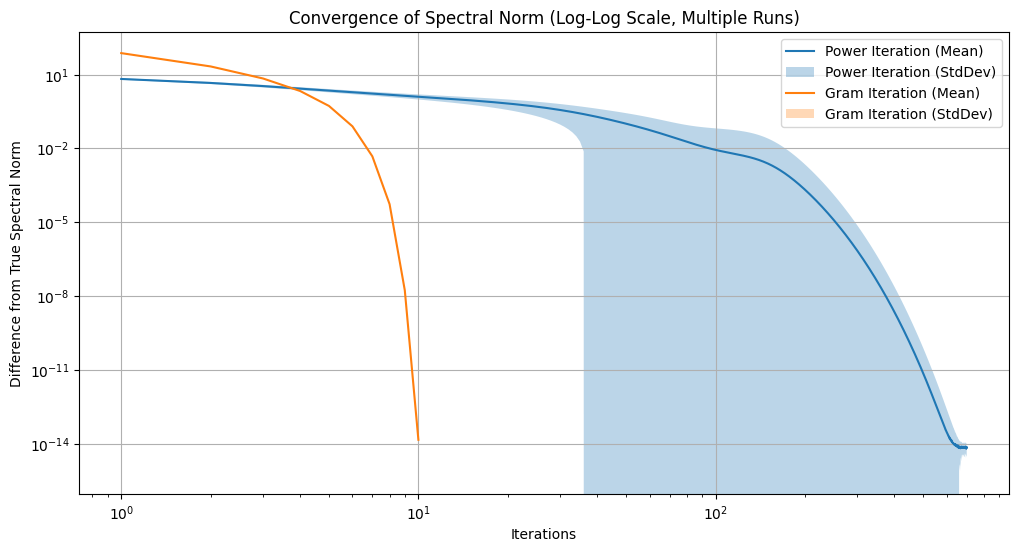

In [39]:
diffs_pi_runs = spectral_norm_diff_runs("power_iteration", iterations_pi + 1, sigma1_NP, num_runs)
diffs_gi_runs = spectral_norm_diff_runs("gram_iteration", iterations_gi + 1, sigma1_NP, num_runs)
diffs_pi = diffs_pi_runs[num_runs // 2]
diffs_gi = diffs_gi_runs[num_runs // 2]

plt.figure(figsize=(12, 6))
# Plot mean and standard deviation for Power Iteration
mean_pi = np.mean(diffs_pi_runs, axis=0)
std_pi = np.std(diffs_pi_runs, axis=0)
plt.loglog(range(1, iterations_pi + 1), mean_pi,label="Power Iteration (Mean)")
plt.fill_between(range(1, iterations_pi + 1), mean_pi - std_pi,mean_pi + std_pi, alpha=0.3, label="Power Iteration (StdDev)")

# Plot mean and standard deviation for Gram Iteration
mean_gi = np.mean(diffs_gi_runs, axis=0)
std_gi = np.std(diffs_gi_runs, axis=0)
plt.loglog(range(1, iterations_gi + 1), mean_gi, label="Gram Iteration (Mean)")
plt.fill_between(range(1, iterations_gi + 1), mean_gi - std_gi,mean_gi + std_gi, alpha=0.3, label="Gram Iteration (StdDev)")

plt.xlabel("Iterations")
plt.ylabel("Difference from True Spectral Norm")
plt.title("Convergence of Spectral Norm (Log-Log Scale, Multiple Runs)")
plt.legend()
plt.grid(True)
plt.show()


### 8. Convergence Plots

This plot shows the convergence of the spectral norm for multiple runs. The differences from the true spectral norm are plotted for both Power and Gram iterations, with logarithmic scaling on both axes. The plot includes labels for each iteration and a legend to differentiate between the two methods.


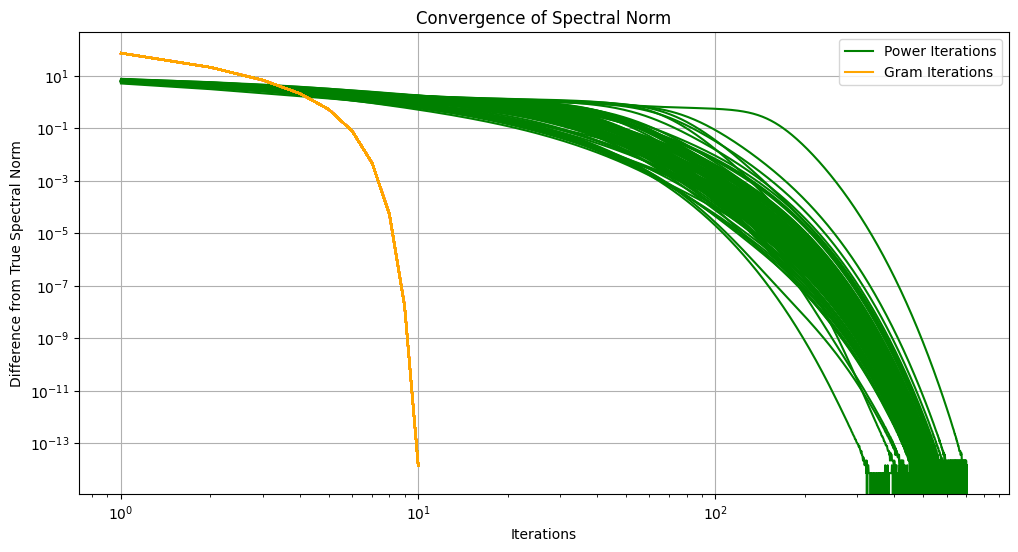

In [40]:
plt.figure(figsize=(12, 6))
for diffs_pi in diffs_pi_runs:
    plt.loglog(range(1, iterations_pi+1), diffs_pi, label="Power Iterations", color='green')
for diffs_gi in diffs_gi_runs:
    plt.loglog(range(1, iterations_gi+1), diffs_gi, label="Gram Iterations", color='orange')

plt.xlabel("Iterations")
plt.ylabel("Difference from True Spectral Norm")
plt.title("Convergence of Spectral Norm")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.grid(True)
plt.show()


### 9. Differences between Power Iteration and Gram Iteration

- **Gram iteration** converges faster, and its rate of convergence tends to increase as the algorithm progresses.
- **Power iteration** generally has a higher computational cost per iteration compared to Gram iteration.
- **Gram iteration** relies on matrix operations (Frobenius norm), which can lead to numerical instability for large matrices.
- **Gram iteration** generally shows a lower average run time compared to **Power iteration**.


### 10.a. Algorithm: `find_minimum_EV(matrix)`
**Input**: Matrix $G$

1. If all elements in $G$ are zero, then:  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `# Return 0 if G is a zero matrix`  
   &nbsp;&nbsp;&nbsp;&nbsp; Return 0  

2. Set $\sigma_1 \leftarrow \text{power\_iteration}(G, N_{\text{iter}})$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `# Approximate largest singular value of G`

3. Define shifted matrix:  
   $G_{\text{shifted}} \leftarrow G + (\sigma_1 + 1) \cdot I$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `# Shift G by adding $(\sigma_1 + 1)$ times identity matrix`

4. $G_{\text{shifted\_inverse}} \leftarrow \text{inverse}(G_{\text{shifted}})$  &nbsp;&nbsp;&nbsp;&nbsp; `# Invert shifted matrix`

5. Set $\sigma_{\text{min\_shifted\_inverse}} \leftarrow \text{power\_iteration}(G_{\text{shifted\_inverse}}, N_{\text{iter}})$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `# Approximate largest singular value of inverse`

6. $\sigma_{\text{min\_shifted}} \leftarrow \frac{1}{\sigma_{\text{min\_shifted\_inverse}}}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `# Invert to get smallest singular value of shifted G`

7. $\sigma_{\text{min}} \leftarrow \sigma_{\text{min\_shifted}} - (\sigma_1 + 1)$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `# Adjust for shift to obtain smallest singular value of G`

8. Return $\sigma_{\text{min}}$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `# Return final result`


In [41]:
def find_minimum_EV(matrix):
    if (np.all(matrix == 0)):
        return 0
    sigma1_PI, _ = power_iteration(matrix, iterations_pi)
    matrix += np.eye(matrix.shape[0]) * (sigma1_PI + 1)
    matrix = np.linalg.inv(matrix)
    sigma1_PI_shifted, _ = power_iteration(matrix, iterations_pi)
    sigma1_PI_shifted = 1 / sigma1_PI_shifted
    sigma_min = sigma1_PI_shifted - (sigma1_PI + 1)
    return round(sigma_min, 2)


### 10.b To Find The Maximum Eigenvalue
Only three changes have to be made as follows:-
0. in step 3,
1. in step 6, and
2. in step 7

**Pseudocode will look like**
### Algorithm: `find_maximum_EV(matrix)`
**Input**: Matrix $G$

1. If all elements in $G$ are zero, then:  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `# Return 0 if G is a zero matrix`  
   &nbsp;&nbsp;&nbsp;&nbsp; Return 0  

2. Set $\sigma_1 \leftarrow \text{power\_iteration}(G, N_{\text{iter}})$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `# Approximate largest singular value of G`

3. Define shifted matrix:  
   $G_{\text{shifted}} \leftarrow G - (\sigma_1 + 1) \cdot I$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `# Shift G by subtracting $(\sigma_1 + 1)$ times identity matrix`

4. $G_{\text{shifted\_inverse}} \leftarrow \text{inverse}(G_{\text{shifted}})$  &nbsp;&nbsp;&nbsp;&nbsp; `# Invert shifted matrix`

5. Set $\sigma_{\text{max\_shifted\_inverse}} \leftarrow \text{power\_iteration}(G_{\text{shifted\_inverse}}, N_{\text{iter}})$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `# Approximate largest singular value of inverse`

6. $\sigma_{\text{max\_shifted}} \leftarrow \frac{-1}{\sigma_{\text{max\_shifted\_inverse}}}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `# Invert to get largest singular value of shifted G and make it negative`

7. $\sigma_{\text{max}} \leftarrow \sigma_{\text{max\_shifted}} + (\sigma_1 + 1)$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `# Adjust for shift to obtain largest singular value of G`

8. Return $\sigma_{\text{max}}$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `# Return final result`



### Testing:
1. **Matrix Creation**: A random $10 \times 10$ matrix is created and symmetrized.
2. **Testing the Function**: We use the `find_minimum_EV` function to find the smallest eigenvalue of the matrix.

This code will create a symmetric matrix, apply the power iteration method, and print the smallest eigenvalue.


In [42]:
max_EV = 10001
min_EV = -10000
size = 10
for _ in range(10):
    diag = random.sample(range(min_EV, max_EV), size) # predetermined random eigenvalues
    D = np.diag(diag) # diagonal elements
    Q, _ = np.linalg.qr(np.random.rand(size, size))
    matrix = Q @ D @ Q.T # symmetric matrix
    print("\nEigenvalues", (sorted(diag)))
    print("minimum eigenvalue by construction:", min(diag))
    print("minimum eigenvalue calculated:" ,find_minimum_EV(matrix))


Eigenvalues [-9196, -6420, -2775, -502, -280, 1717, 2103, 2180, 5788, 9329]
minimum eigenvalue by construction: -9196
minimum eigenvalue calculated: -9196.0

Eigenvalues [-8128, -4294, -3678, -1633, 1816, 2036, 5307, 5309, 6561, 9616]
minimum eigenvalue by construction: -8128
minimum eigenvalue calculated: -8128.0

Eigenvalues [-9885, -4498, -3770, -1157, 67, 530, 1564, 3385, 4111, 5269]
minimum eigenvalue by construction: -9885
minimum eigenvalue calculated: -9885.0

Eigenvalues [-9104, -8209, -7344, -7034, 563, 2676, 7880, 8384, 9509, 9863]
minimum eigenvalue by construction: -9104
minimum eigenvalue calculated: -9104.0

Eigenvalues [-9317, -8637, -7752, -3970, -399, 574, 1574, 6297, 7132, 7469]
minimum eigenvalue by construction: -9317
minimum eigenvalue calculated: -9317.0

Eigenvalues [-8200, -6719, -2498, -1903, -1819, 1425, 3740, 4626, 7007, 9663]
minimum eigenvalue by construction: -8200
minimum eigenvalue calculated: -8200.0

Eigenvalues [-6020, -4633, -3912, -202, 1551, 1824